# Serverless platform scaling with rps, keda, cpu

In [281]:
import pandas as pd
import warnings

warnings.filterwarnings('ignore')

## Running Time 120s, spawn rate 0.04 rps, for 10 concurrent users

In [505]:
df_k8shpa = pd.read_csv("stats_df_45_120_k8s_0.05.csv")
df_rps = pd.read_csv("stats_df_45_120_rps_0.05.csv")
df_kda = pd.read_csv("stats_df_47_120_keda_0.05.csv")


Text(0, 0.5, 'CDF')

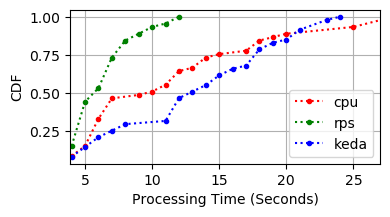

In [506]:
from matplotlib import pyplot as plt
fig, ax = plt.subplots(figsize=(4, 2))
ax.plot(df_k8shpa['PT'],df_k8shpa['cdf'],  linestyle='dotted', color='r', marker='.',label='cpu')
ax.plot(df_rps['PT'],df_rps['cdf'],  linestyle='dotted', color='g', marker='.',label='rps')
ax.plot(df_kda['PT'],df_kda['cdf'],  linestyle='dotted', color='b', marker='.',label='keda')
plt.xlim([3.9, 27])
plt.grid()
plt.legend()
#plt.legend(loc='best')
ax.set_xlabel('Processing Time (Seconds)', fontsize=10)
ax.set_ylabel('CDF', fontsize=10)
#ax2.set_ylabel("# of Pods")

## Processing Time


In [510]:
df_k8shpa = pd.read_csv("10_120_k8s_0.05.csv")
df_rps = pd.read_csv("10_120_rps_0.05.csv")
df_kda = pd.read_csv("10_120_keda_0.05.csv")
df = df_k8shpa
df['k8a_hps'] =df_k8shpa['PT'] 
df['openfaas_rps']= df_rps['PT']
df['keda']=df_kda['PT']

Text(0.5, 0, 'Scaling Approaches')

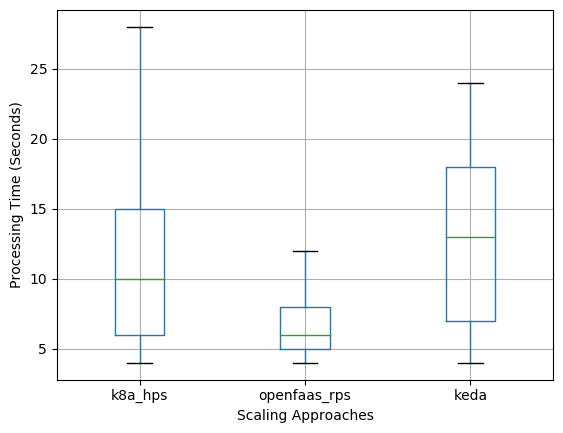

In [511]:
bx = df.boxplot(column=['k8a_hps','openfaas_rps','keda'])  
bx.set_ylabel('Processing Time (Seconds)')
bx.set_xlabel('Scaling Approaches')



In [522]:
df_results_keda = pd.read_csv("keda_results/promo_metrics47_120_keda_0.05.csv")
df_results_rps = pd.read_csv("keda_results/promo_metrics45_120_rps_0.05.csv")
df_results_cpu = pd.read_csv("keda_results/promo_metrics45_120_k8s_0.05.csv")


Text(0, 0.5, 'CPU')

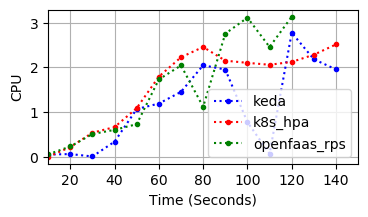

In [537]:
fig, ax = plt.subplots(figsize=(4, 2))
ax.plot(df_results_keda['seconds'],df_results_keda['cpu_used'], linestyle='dotted', color='b', marker='.',label='keda')
ax.plot(df_results_cpu['seconds'],df_results_cpu['cpu_used'],linestyle='dotted',  color='r', marker='.',label='k8s_hpa')
ax.plot(df_results_rps['seconds'],df_results_rps['cpu_used'], linestyle='dotted', color='g', marker='.',label='openfaas_rps')
plt.xlim([10, 150])
plt.grid()
#plt.legend()
plt.legend()
ax.set_xlabel('Time (Seconds)', fontsize=10)
ax.set_ylabel('CPU', fontsize=10)

Text(0, 0.5, 'Memory')

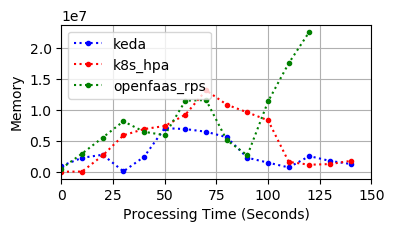

In [538]:
fig, ax = plt.subplots(figsize=(4, 2))
ax.plot(df_results_keda['seconds'],df_results_keda['memory_used'], linestyle='dotted', color='b', marker='.',label='keda')
ax.plot(df_results_cpu['seconds'],df_results_cpu['memory_used'],linestyle='dotted',  color='r', marker='.',label='k8s_hpa')
ax.plot(df_results_rps['seconds'],df_results_rps['memory_used'], linestyle='dotted', color='g', marker='.',label='openfaas_rps')
plt.xlim([0, 150])
plt.grid()
plt.legend()
#plt.legend(loc='best')
ax.set_xlabel('Processing Time (Seconds)', fontsize=10)
ax.set_ylabel('Memory', fontsize=10)

In [539]:
df = df_results_keda
df['cpu_t'] =df_results_cpu['throughput'] 
df['rps_t']= df_results_rps['throughput']
df['mql_t']=df_results_keda['throughput']

Text(0.5, 0, 'Scaling Approaches')

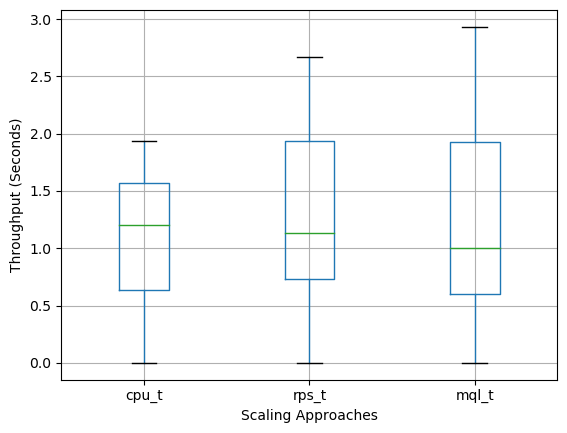

In [540]:

bx = df.boxplot(column=['cpu_t','rps_t','mql_t'])  
bx.set_ylabel('Throughput (Seconds)')
bx.set_xlabel('Scaling Approaches')


Text(0, 0.5, 'Thorughput (rps)')

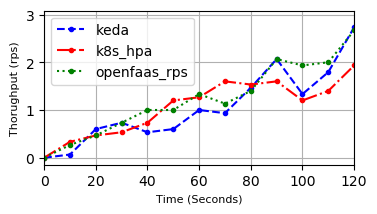

In [541]:
df_results_keda['unused']= df_results_keda['cpu_requested']-df_results_keda['cpu_used']
df_results_rps['unused']= df_results_rps['cpu_requested']-df_results_rps['cpu_used']
df_results_cpu['unused']= df_results_cpu['cpu_requested']-df_results_keda['cpu_used']
fig, ax = plt.subplots(figsize=(4, 2))
ax.plot(df_results_keda['seconds'],df_results_keda['throughput'], linestyle='dashed', color='b', marker='.',label='keda')
ax.plot(df_results_cpu['seconds'],df_results_cpu['throughput'],linestyle='dashdot',  color='r', marker='.',label='k8s_hpa')
ax.plot(df_results_rps['seconds'],df_results_rps['throughput'], linestyle='dotted', color='g', marker='.',label='openfaas_rps')
plt.xlim([0, 120])
plt.grid()
plt.legend()
#plt.legend(loc='best')
ax.set_xlabel('Time (Seconds)', fontsize=8)
ax.set_ylabel('Thorughput (rps)', fontsize=8)

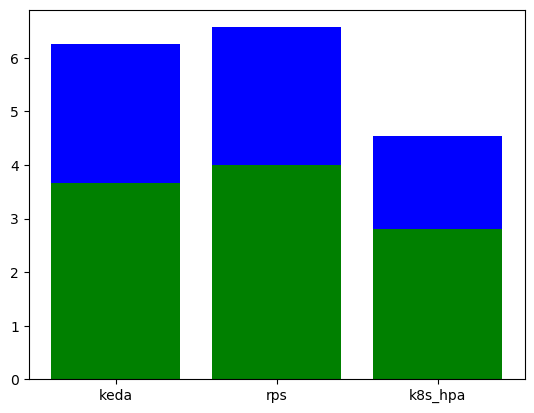

In [542]:
# importing package
import matplotlib.pyplot as plt

# create data
x = ['keda', 'rps', 'k8s_hpa']
y1 = [df_results_keda['cpu_requested'].mean(),df_results_rps['cpu_requested'].mean(),df_results_cpu['cpu_requested'].mean()]
y2 = [df_results_keda['cpu_used'].mean(),df_results_rps['cpu_used'].mean(),df_results_cpu['cpu_used'].mean()]
y3 = [df_results_keda['unused'].mean(),df_results_rps['unused'].mean(),df_results_cpu['unused'].mean()]

# plot bars in stack manner
plt.bar(x, y1, color='g')
plt.bar(x, y3, bottom=y1, color='b')
#plt.bar(x, y3, bottom=y1, color='g')
plt.show()



Text(0, 0.5, '# of Pods')

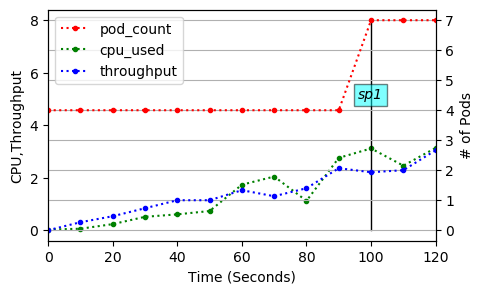

In [543]:
fig, ax1 = plt.subplots(figsize=(5, 3))
ax2 = ax1.twinx()


p1=ax2.plot(df_results_rps['seconds'],df_results_rps['pod_count'],   linestyle='dotted', color='r', marker='.',label='pod_count')
#ax1.plot(df_results_cpu['seconds'],df_results_cpu['cpu_requested'],   linestyle='solid', color='g', marker='.',label='cpu_requested')
p2=ax1.plot(df_results_rps['seconds'],df_results_rps['cpu_used'],   linestyle='dotted', color='g', marker='.',label='cpu_used')
p3=ax2.plot(df_results_rps['seconds'],df_results_rps['throughput'],   linestyle='dotted', color='b', marker='.',label='throughput')
#ax1.plot(df_results_rps['seconds'],df_results_rps['cpu_used'],  linestyle='dashdot', color='b', marker='.',label='rps')
plt.xlim([0, 120])
plt.grid()
# ax1.legend(loc=0)
# ax2.legend(loc=0)
leg = p1 + p2+p3
labs = [l.get_label() for l in leg]
plt.legend(leg, labs, loc=0)
#ax1.legend(loc='best')
#ax1.plot([60, 60], [0, 8], 'k-', lw=1, label='scale point')
ax1.plot([100, 100], [0, 8], 'k-', lw=1, label='scale point')

#ax1.text(55, 7, 'sp1', style='italic',
 #       bbox={'facecolor': 'cyan', 'alpha': 0.5, 'pad': 3})
ax1.text(96, 5, 'sp1', style='italic',
        bbox={'facecolor': 'cyan', 'alpha': 0.5, 'pad': 3})


ax1.set_xlabel('Time (Seconds)', fontsize=10)
ax1.set_ylabel('CPU,Throughput', fontsize=10)
ax2.set_ylabel("# of Pods")


Text(0, 0.5, '# of Pods')

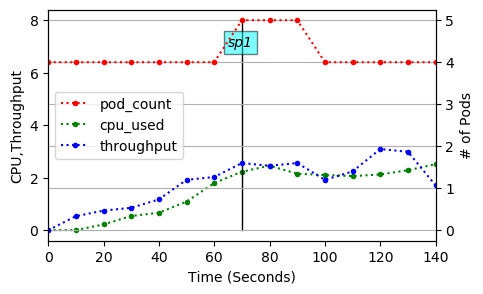

In [548]:
fig, ax1 = plt.subplots(figsize=(5, 3))
ax2 = ax1.twinx()


p1=ax2.plot(df_results_cpu['seconds'],df_results_cpu['pod_count'],   linestyle='dotted', color='r', marker='.',label='pod_count')
#ax1.plot(df_results_cpu['seconds'],df_results_cpu['cpu_requested'],   linestyle='solid', color='g', marker='.',label='cpu_requested')
p2=ax1.plot(df_results_cpu['seconds'],df_results_cpu['cpu_used'],   linestyle='dotted', color='g', marker='.',label='cpu_used')
p3=ax2.plot(df_results_cpu['seconds'],df_results_cpu['throughput'],   linestyle='dotted', color='b', marker='.',label='throughput')

#ax1.plot(df_results_rps['seconds'],df_results_rps['cpu_used'],  linestyle='dashdot', color='b', marker='.',label='rps')
plt.xlim([0, 140])
plt.grid()
# ax1.legend(loc=0)
# ax2.legend(loc=0)
leg = p1 + p2+p3
labs = [l.get_label() for l in leg]
plt.legend(leg, labs, loc=0)
#ax1.legend(loc='best')
#ax1.annotate('annotate', xy=(60, 8), xytext=(80, 6),
 #           arrowprops=dict(facecolor='black', shrink=0.001))
ax1.plot([70, 70], [0, 8], 'k-', lw=1, label='scale point')
#ax1.plot([120, 120], [0, 8], 'k-', lw=1, label='scale point')

ax1.text(65, 7, 'sp1', style='italic',
        bbox={'facecolor': 'cyan', 'alpha': 0.5, 'pad': 3})
#ax1.text(115, 7, 'sp2', style='italic',
 #       bbox={'facecolor': 'cyan', 'alpha': 0.5, 'pad': 3})
ax1.set_xlabel('Time (Seconds)', fontsize=10)
ax1.set_ylabel('CPU,Throughput', fontsize=10)
ax2.set_ylabel("# of Pods")




Text(0, 0.5, '# of Pods')

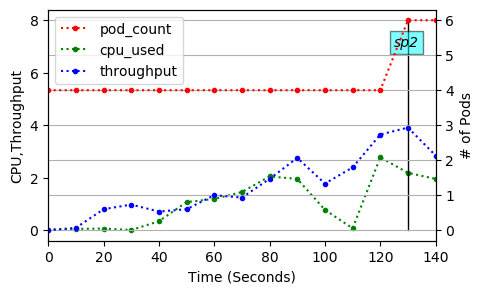

In [551]:
fig, ax1 = plt.subplots(figsize=(5, 3))
ax2 = ax1.twinx()

p1=ax2.plot(df_results_keda['seconds'],df_results_keda['pod_count'],   linestyle='dotted', color='r', marker='.',label='pod_count')
#ax1.plot(df_results_cpu['seconds'],df_results_cpu['cpu_requested'],   linestyle='solid', color='g', marker='.',label='cpu_requested')
p2=ax1.plot(df_results_keda['seconds'],df_results_keda['cpu_used'],   linestyle='dotted', color='g', marker='.',label='cpu_used')
p3=ax2.plot(df_results_keda['seconds'],df_results_keda['throughput'],   linestyle='dotted', color='b', marker='.',label='throughput')
#ax1.plot(df_results_rps['seconds'],df_results_rps['cpu_used'],  linestyle='dashdot', color='b', marker='.',label='rps')
plt.xlim([0, 140])
plt.grid()
# ax1.legend(loc=0)
# ax2.legend(loc=0)
leg = p1 + p2+p3
labs = [l.get_label() for l in leg]
plt.legend(leg, labs, loc=0)
#ax1.legend(loc='best')

#ax1.plot([20, 20], [0, 8], 'k-', lw=1, label='scale point')
ax1.plot([130, 130], [0, 8], 'k-', lw=1, label='scale point')

# ax1.text(15, 5, 'sp1', style='italic',
#         bbox={'facecolor': 'cyan', 'alpha': 0.5, 'pad': 3})
ax1.text(125, 7, 'sp2', style='italic',
        bbox={'facecolor': 'cyan', 'alpha': 0.5, 'pad': 3})
ax1.set_xlabel('Time (Seconds)', fontsize=10)
ax1.set_ylabel('CPU,Throughput', fontsize=10)
ax2.set_ylabel("# of Pods")
